In [1]:
import matplotlib.pyplot  as plt
import numpy              as np
from f_blind import f_blind

def autocorrelation(m_posterior):
	# Compute the mean
	mean = np.mean(m_posterior)
	
	# Compute the variance
	var = np.var(m_posterior)
	
	# Initialize the autocorrelation vector
	autocorr = np.correlate(m_posterior - mean, m_posterior - mean, mode='full')
	
	# Normalize the autocorrelation vector
	autocorr = autocorr[len(m_posterior)-1:] / ( var * np.arange(len(m_posterior), 0, -1))
	
	return autocorr

## 2A. Rejection sampling

In [2]:
f_max   = .1
N_acc   = 10000
T=1;

i_acc   = 0
x_acc   = []
j = 0;
while (i_acc<N_acc):
    j=j+1
    x_pro    = np.random.rand()*100
    f        = f_blind(x_pro)
    if f>f_max:
        # DO SOMETHING
        print("found higher f_max, %f>%f" % (f,f_max))
        # STOP
        
    P_acc    = (f/f_max)**(1/T)
    # accept with probability P_acc
    if np.random.rand() < P_acc:
       i_acc = i_acc+1
       x_acc.append(x_pro)
x_acc = np.array(x_acc)

print('Accepted i_acc=%d of %d proposed models' % (i_acc,j))
print('Accept ratio =  %4.3f' % (i_acc/j))
N10=len(np.where(x_acc>10)[0])
Px10 = N10/N_acc
print('P(x>10)= %d/%d = %3.2f'%(N10,N_acc,Px10))

Accepted i_acc=10000 of 62476 proposed models
Accept ratio =  0.160
P(x>10)= 7670/10000 = 0.77


Text(0.5, 0, 'x')

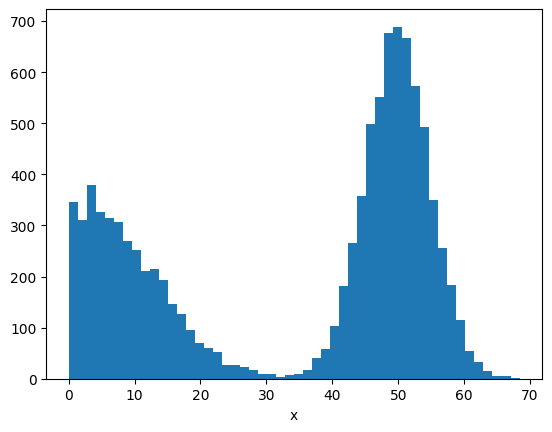

In [3]:
plt.hist(x_acc,bins=50)
plt.xlabel('x')

Text(0.5, 0, 'Number of accepted model')

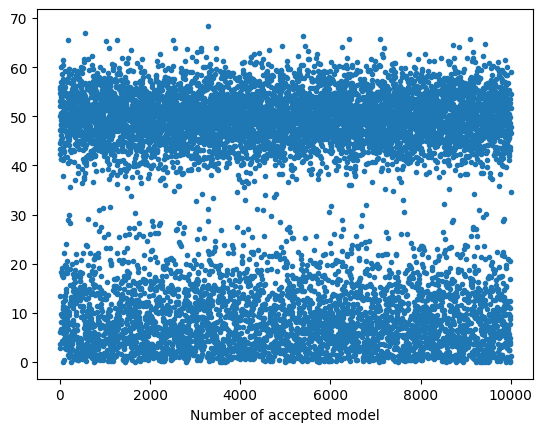

In [4]:
plt.plot(x_acc,'.')
plt.xlabel('Number of accepted model')

Text(0, 0.5, 'Autocorrelation')

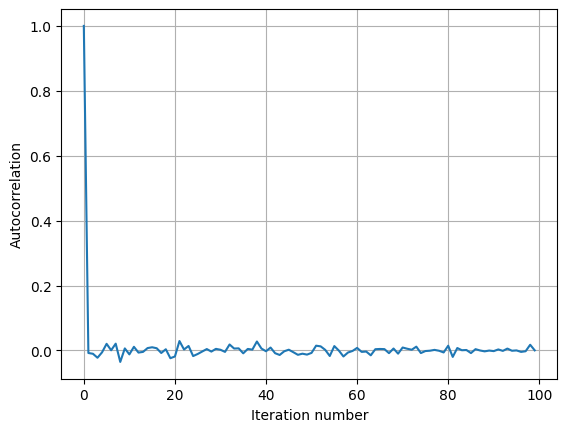

In [5]:
autocorr_x_acc = autocorrelation(np.array(x_acc))
plt.plot(autocorr_x_acc[0:100])
plt.grid()
plt.xlabel('Iteration number')
plt.ylabel('Autocorrelation')

## Annealing analysis

Text(0, 0.5, 'f(x)')

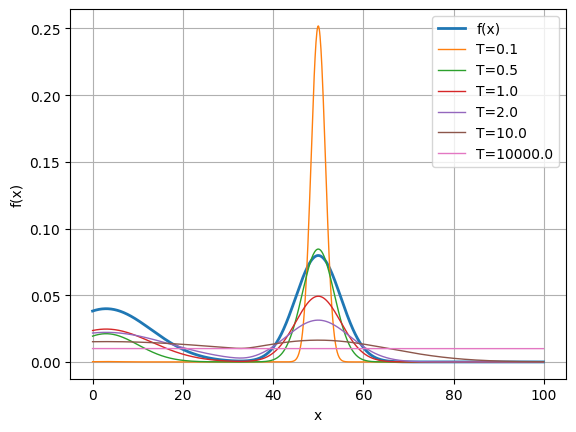

In [6]:
x = np.arange(0,100,.1)
nx=len(x);
dx=x[1]-x[0]
T_arr = [0.1, 0.5, 1, 2, 10,10000]
nT=len(T_arr)

# Compute 'annealed' f(x)
f = np.zeros((nT,nx))
for i in np.arange(nT):
    for j in np.arange(nx):
        f[i,j]=f_blind(x[j])**(1/T_arr[i])
    # Normalize pt pdf
    f[i]=f[i]/np.sum(f[i])/dx


fx = np.zeros((nx))
for j in np.arange(nx):
    fx[j]=f_blind(x[j])

# Plot 'annealed' f(x)
plt.plot(x,fx, label='f(x)', linewidth=2)
for i in np.arange(nT):
    plt.plot(x,f[i], label='T=%3.1f'%(T_arr[i]), linewidth=1)

plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')


Text(0, 0.5, 'f(x)')

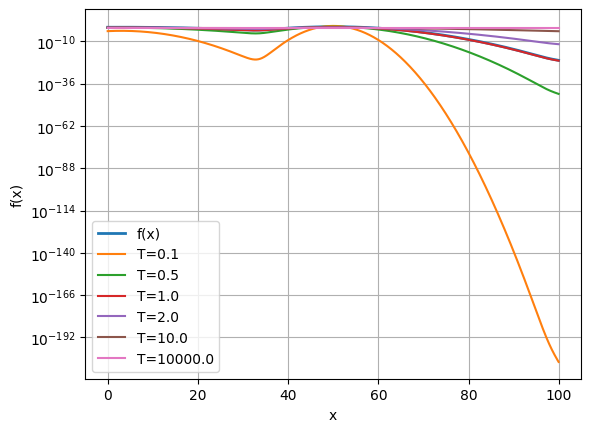

In [7]:
# Plot 'annealed' f(x), 
plt.semilogy(x,fx, label='f(x)', linewidth=2)
for i in np.arange(nT):
    plt.semilogy(x,f[i], label='T=%3.1f'%(T_arr[i]))

plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
